In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

In [30]:
df = pd.read_fwf('./data/port_armada.txt', delim_whitespace = True, names = ['battle','year','port_ships','dutch_ships','eng_ships','ratio_port_to_all','span_invovlement','port_victory'])

Twenty-eight observations and eight columns

In [31]:
df.shape

(28, 8)

No missing values

In [32]:
df.isna().sum().sum()

0

In [33]:
df.sort_values('year')

,battle,year,port_ships,dutch_ships,eng_ships,ratio_port_to_all,span_invovlement,port_victory
15,Invincible Armada,1588,69,0,31,2.226,1,-1
0,Bantam,1601,6,3,0,2.000,0,0
1,Malacca Strait,1606,14,11,0,1.273,0,0
2,Ilha das Naus,1606,6,9,0,0.667,0,-1
3,Pulo Butum,1606,7,9,0,0.778,0,1
4,Surrat,1615,6,0,4,1.500,0,0
5,Ilha das Naus,1615,3,5,0,0.600,0,-1
6,Jask,1620,4,0,4,1.000,0,0
7,Hormuz,1622,6,0,5,1.200,0,-1
8,Mogincoal Shoals,1622,4,4,2,0.667,0,-1


In [34]:
df.drop(['battle','ratio_port_to_all'], axis = 1, inplace = True)
X = df[['port_ships','dutch_ships','eng_ships','span_invovlement']]
y = df['port_victory']

In [35]:
svm_acc = [0] * 1000
rf_acc = [0] * 1000
log_acc = [0] * 1000

for i in range(1000):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)

    rf = RandomForestClassifier(n_estimators=500)
    rf.fit(Xtrain, ytrain)
    yhat = rf.predict(Xtest)
    svm_acc[i] = accuracy_score(ytest, yhat)
    
    svm = SVC(kernel = 'linear')
    svm.fit(Xtrain, ytrain)
    yhat = svm.predict(Xtest)
    rf_acc[i] = accuracy_score(ytest, yhat)

    log = LogisticRegression()
    log.fit(Xtrain, ytrain)
    yhat = log.predict(Xtest)
    log_acc[i] = accuracy_score(ytest, yhat)

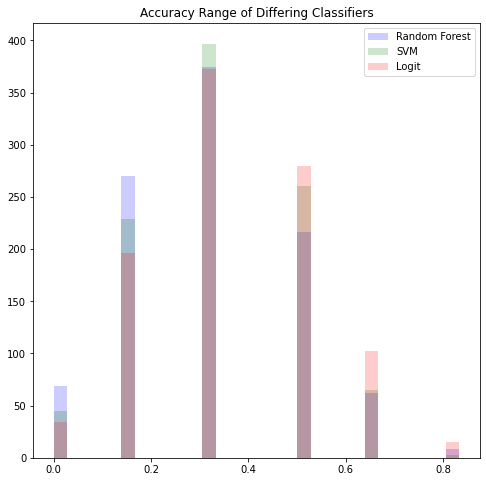

In [37]:
plt.figure(figsize=(8,8))
plt.hist(x = svm_acc, color='blue', label='Random Forest', alpha = 0.2, bins = 30)
plt.hist(x = rf_acc, color = 'green', label='SVM', alpha = 0.2, bins = 30)
plt.hist(x = log_acc, color = 'red', label = 'Logit', alpha = 0.2, bins = 30)
plt.title("Accuracy Range of Differing Classifiers")
plt.legend()
plt.savefig('assignment8hist.pdf');

They do slightly better than guessing.